In [1]:
import pandas as pd
from keras.models import load_model, Sequential
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras import backend as K
import sklearn.metrics as skm, math

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [37]:
#Load saved model
model = load_model('model13.h5', custom_objects={'rmse': rmse, 'r_square': r_square})
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________


In [3]:
df = pd.read_csv('Options_R_test.csv')
df = df[df['underlying_price'].notnull()]
df.head()

,ticker,date,exdate,maturity,strike_price,best_offer,impl_volatility,realized_vol,underlying_price,interest_rate,cp_flag_C,cp_flag_P
0,AXP,2016-01-04,2016-01-08,4,100.0,0.13,1.695791,0.208476,67.59,0.0022,1,0
1,AXP,2016-01-04,2016-01-08,4,105.0,0.13,1.869624,0.208476,67.59,0.0022,1,0
2,AXP,2016-01-04,2016-01-08,4,66.0,1.70,0.238987,0.208476,67.59,0.0022,1,0
3,AXP,2016-01-04,2016-01-08,4,66.5,1.31,0.246213,0.208476,67.59,0.0022,1,0
4,AXP,2016-01-04,2016-01-08,4,67.0,0.95,0.242758,0.208476,67.59,0.0022,1,0


### With Realized Volatility

In [38]:
y2 = df['best_offer'].values
X2 = df[['maturity', 'strike_price', 'realized_vol', 'underlying_price', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]
X2.head()

,maturity,strike_price,realized_vol,underlying_price,cp_flag_C,cp_flag_P,interest_rate
0,4,100.0,0.208476,67.59,1,0,0.0022
1,4,105.0,0.208476,67.59,1,0,0.0022
2,4,66.0,0.208476,67.59,1,0,0.0022
3,4,66.5,0.208476,67.59,1,0,0.0022
4,4,67.0,0.208476,67.59,1,0,0.0022


In [39]:
X2 = preprocessing.normalize(X2)

In [42]:
pred_R = model.predict(X2)
print('Prediction:\n', pred_R[:10])
print('\n')
print('Actual:\n', y2[:10])

Prediction:
 [[-0.9947671 ]
 [-0.9767634 ]
 [ 1.618005  ]
 [ 1.3256259 ]
 [ 1.0366731 ]
 [ 0.7992919 ]
 [ 0.5684584 ]
 [ 0.3945852 ]
 [ 0.3358479 ]
 [ 0.27181274]]


Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


In [43]:
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y2,pred_R))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y2,pred_R))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y2,pred_R)))
print("R square (R^2):                 %f" % skm.r2_score(y2,pred_R))

Mean absolute error (MAE):      1.245420
Mean squared error (MSE):       11.366141
Root mean squared error (RMSE): 3.371371
R square (R^2):                 0.948572


#### Predict special ticker which was used to train the model

In [91]:
MCD = df[df.ticker == 'MCD']
y_MCD = MCD['best_offer'].values
X_MCD = MCD[['maturity', 'strike_price', 'realized_vol', 'underlying_price', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]

In [92]:
X_MCD = preprocessing.normalize(X_MCD)
y_MCD = y_MCD.reshape(-1,1)

In [93]:
pred_MCD = model.predict(X_MCD)
print('Prediction:\n', pred_MCD[:10])
print('\n')
print('Actual:\n', y_MCD[:10])

Prediction:
 [[ 2.3215168 ]
 [ 1.3978105 ]
 [ 0.800794  ]
 [ 0.36472577]
 [ 0.1758582 ]
 [ 0.08003968]
 [ 0.0376575 ]
 [ 0.03258914]
 [-0.00774258]
 [-0.04725128]]


Actual:
 [[3.1 ]
 [2.23]
 [1.49]
 [0.9 ]
 [0.49]
 [0.25]
 [0.13]
 [0.07]
 [0.05]
 [0.13]]


In [94]:
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_MCD,pred_MCD))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_MCD,pred_MCD))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_MCD,pred_MCD)))
print("R square (R^2):                 %f" % skm.r2_score(y_MCD,pred_MCD))

Mean absolute error (MAE):      1.064137
Mean squared error (MSE):       4.993369
Root mean squared error (RMSE): 2.234585
R square (R^2):                 0.965929


In [95]:
GS = df[df.ticker == 'GS']
y_GS = GS['best_offer'].values
X_GS = GS[['maturity', 'strike_price', 'realized_vol', 'underlying_price', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]

In [96]:
X_GS = preprocessing.normalize(X_GS)
pred_GS = model.predict(X_GS)
print('Prediction:\n', pred_GS[:10])
print('\n')
print('Actual:\n', y_GS[:10])

Prediction:
 [[5.9363313 ]
 [4.097701  ]
 [2.8001225 ]
 [1.9598825 ]
 [1.1927996 ]
 [0.6488946 ]
 [0.39673084]
 [0.21955419]
 [0.08179379]
 [0.03232047]]


Actual:
 [5.45 3.5  2.02 1.04 0.47 0.21 0.12 0.07 0.13 0.03]


In [97]:
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_GS,pred_GS))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_GS,pred_GS))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_GS,pred_GS)))
print("R square (R^2):                 %f" % skm.r2_score(y_GS,pred_GS))

Mean absolute error (MAE):      2.462353
Mean squared error (MSE):       37.482205
Root mean squared error (RMSE): 6.122271
R square (R^2):                 0.936342


#### Predict special ticker which was not used to train the model

In [59]:
AAPL = pd.read_csv('Options2016AAPL_withReaVo.csv')
AAPL.head()

,Unnamed: 0,Strike Price,Lowest Closing Ask Across All Exchanges,Underlying Price,maturity,"C=Call, P=Put_C","C=Call, P=Put_P",interest_rate,days,volatility
0,0,100.0,5.45,105.35,4,1,0,0.0022,30,0.218791
1,1,101.0,4.50,105.35,4,1,0,0.0022,30,0.218791
2,2,102.0,3.65,105.35,4,1,0,0.0022,30,0.218791
3,3,103.0,2.79,105.35,4,1,0,0.0022,30,0.218791
4,4,104.0,2.06,105.35,4,1,0,0.0022,30,0.218791


In [70]:
AAPL = AAPL[AAPL['interest_rate'].notnull()]

In [71]:
y_AAPL = AAPL['Lowest  Closing Ask Across All Exchanges'].values
X_AAPL = AAPL[['maturity', 'Strike Price', 'volatility', 'Underlying Price', 'C=Call, P=Put_C', 'C=Call, P=Put_P', 'interest_rate']]

In [72]:
X_AAPL = preprocessing.normalize(X_AAPL)
y_AAPL = y_AAPL.reshape(-1,1)

In [73]:
pred4 = model.predict(X_AAPL)
print('Prediction:\n', pred4[:10])
print('\n')
print('Actual:\n', y_AAPL[:10])

Prediction:
 [[5.4338818 ]
 [4.5494175 ]
 [3.6288536 ]
 [2.7997174 ]
 [2.1064494 ]
 [1.4581447 ]
 [0.99268407]
 [0.5368069 ]
 [0.24624091]
 [0.1311115 ]]


Actual:
 [[5.45]
 [4.5 ]
 [3.65]
 [2.79]
 [2.06]
 [1.43]
 [0.93]
 [0.56]
 [0.32]
 [0.18]]


In [74]:
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_AAPL,pred4))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_AAPL,pred4))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_AAPL,pred4)))
print("R square (R^2):                 %f" % skm.r2_score(y_AAPL,pred4))

Mean absolute error (MAE):      3.518400
Mean squared error (MSE):       81.153715
Root mean squared error (RMSE): 9.008536
R square (R^2):                 0.868447


### Use model trained by sample dataset to predict option price

In [6]:
def predict(model, df):
    
    model = load_model(model, custom_objects={'rmse': rmse, 'r_square': r_square})
    
    y = df['best_offer'].values
    X = df[['maturity', 'strike_price', 'realized_vol', 'underlying_price', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]
    X = preprocessing.normalize(X)
    
    pred = model.predict(X)
    print('Prediction:\n', pred[:10])
    print('Actual:\n', y[:10])
    print('\n')
    
    MAE = skm.mean_absolute_error(y,pred)
    MSE = skm.mean_squared_error(y,pred)
    RMSE = math.sqrt(skm.mean_squared_error(y,pred))
    R_2 = skm.r2_score(y,pred)
    
    print("Mean absolute error (MAE):      %f" % MAE)
    print("Mean squared error (MSE):       %f" % MSE)
    print("Root mean squared error (RMSE): %f" % RMSE)
    print("R square (R^2):                 %f" % R_2)
    
    return pred, MAE, MSE, RMSE, R_2

In [7]:
pred1, MAE1, MSE1, RMSE1, R_2_1 = predict('model10000.h5', df)

Prediction:
 [[0.06853972]
 [0.04915916]
 [1.5456787 ]
 [1.2251867 ]
 [0.92827296]
 [0.6704222 ]
 [0.54896533]
 [0.45997775]
 [0.37162077]
 [0.28354633]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      2.559878
Mean squared error (MSE):       71.921719
Root mean squared error (RMSE): 8.480667
R square (R^2):                 0.674578


In [8]:
pred2, MAE2, MSE2, RMSE2, R_2_2 = predict('model20000.h5', df)

Prediction:
 [[0.56521493]
 [1.0019791 ]
 [2.7107553 ]
 [2.2791758 ]
 [1.7774205 ]
 [1.2792284 ]
 [0.7845612 ]
 [0.29784423]
 [0.08813506]
 [0.04379827]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      2.286436
Mean squared error (MSE):       66.544301
Root mean squared error (RMSE): 8.157469
R square (R^2):                 0.698909


In [9]:
pred3, MAE3, MSE3, RMSE3, R_2_3 = predict('model30000.h5', df)

Prediction:
 [[-0.2714061 ]
 [-0.28740543]
 [ 1.8359252 ]
 [ 1.5928159 ]
 [ 1.3512825 ]
 [ 1.1142906 ]
 [ 0.9042262 ]
 [ 0.6955408 ]
 [ 0.55058306]
 [ 0.47792   ]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.526319
Mean squared error (MSE):       29.468979
Root mean squared error (RMSE): 5.428534
R square (R^2):                 0.866663


In [10]:
pred4, MAE4, MSE4, RMSE4, R_2_4 = predict('model40000.h5', df)

Prediction:
 [[0.01639575]
 [0.02970809]
 [1.4157648 ]
 [1.1903319 ]
 [1.0107656 ]
 [0.83242697]
 [0.65529674]
 [0.4862401 ]
 [0.36004037]
 [0.24773711]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      2.077691
Mean squared error (MSE):       45.851587
Root mean squared error (RMSE): 6.771380
R square (R^2):                 0.792537


In [11]:
pred5, MAE5, MSE5, RMSE5, R_2_5 = predict('model50000.h5', df)

Prediction:
 [[-0.4824172 ]
 [-0.4127284 ]
 [ 1.4357461 ]
 [ 1.0684751 ]
 [ 0.8145279 ]
 [ 0.6726646 ]
 [ 0.53181905]
 [ 0.44970718]
 [ 0.40387526]
 [ 0.35760155]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      2.557052
Mean squared error (MSE):       70.120155
Root mean squared error (RMSE): 8.373778
R square (R^2):                 0.682729


In [12]:
pred6, MAE6, MSE6, RMSE6, R_2_6 = predict('model60000.h5', df)

Prediction:
 [[-0.59941256]
 [-0.74984276]
 [ 1.9533378 ]
 [ 1.6066426 ]
 [ 1.2402238 ]
 [ 0.8930825 ]
 [ 0.5961772 ]
 [ 0.3606764 ]
 [ 0.19960892]
 [ 0.13129377]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      2.299149
Mean squared error (MSE):       53.490040
Root mean squared error (RMSE): 7.313689
R square (R^2):                 0.757975


In [13]:
pred7, MAE7, MSE7, RMSE7, R_2_7 = predict('model70000.h5', df)

Prediction:
 [[-0.5593388 ]
 [-0.6751541 ]
 [ 1.9866337 ]
 [ 1.5926768 ]
 [ 1.1959783 ]
 [ 0.8775362 ]
 [ 0.69198763]
 [ 0.507687  ]
 [ 0.3424298 ]
 [ 0.18849126]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.690066
Mean squared error (MSE):       25.953019
Root mean squared error (RMSE): 5.094411
R square (R^2):                 0.882571


In [14]:
pred8, MAE8, MSE8, RMSE8, R_2_8 = predict('model80000.h5', df)

Prediction:
 [[-0.29771313]
 [-0.26181492]
 [ 1.5310556 ]
 [ 1.1771237 ]
 [ 0.9113371 ]
 [ 0.68972224]
 [ 0.54022616]
 [ 0.42240158]
 [ 0.32155386]
 [ 0.21890274]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.406340
Mean squared error (MSE):       21.063218
Root mean squared error (RMSE): 4.589468
R square (R^2):                 0.904696


In [15]:
pred9, MAE9, MSE9, RMSE9, R_2_9 = predict('model90000.h5', df)

Prediction:
 [[-0.1186014 ]
 [-0.14912947]
 [ 1.8258451 ]
 [ 1.5255431 ]
 [ 1.2258893 ]
 [ 0.9431824 ]
 [ 0.73784393]
 [ 0.55930036]
 [ 0.4367785 ]
 [ 0.32780832]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.174948
Mean squared error (MSE):       14.452129
Root mean squared error (RMSE): 3.801596
R square (R^2):                 0.934609


In [16]:
pred10, MAE10, MSE10, RMSE10, R_2_10 = predict('model100000.h5', df)

Prediction:
 [[-0.4948684 ]
 [-0.30469483]
 [ 1.9907677 ]
 [ 1.6551383 ]
 [ 1.3884785 ]
 [ 1.1162484 ]
 [ 0.828624  ]
 [ 0.5667832 ]
 [ 0.3433001 ]
 [ 0.16655469]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.673734
Mean squared error (MSE):       22.593666
Root mean squared error (RMSE): 4.753280
R square (R^2):                 0.897771


In [17]:
pred15, MAE15, MSE15, RMSE15, R_2_15 = predict('model150000.h5', df)

Prediction:
 [[-0.36535037]
 [ 0.29099077]
 [ 1.5854173 ]
 [ 1.223232  ]
 [ 0.9450074 ]
 [ 0.66876954]
 [ 0.4510128 ]
 [ 0.2889939 ]
 [ 0.14080818]
 [ 0.02689238]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.411754
Mean squared error (MSE):       17.908669
Root mean squared error (RMSE): 4.231864
R square (R^2):                 0.918969


In [18]:
pred20, MAE20, MSE20, RMSE20, R_2_20 = predict('model200000.h5', df)

Prediction:
 [[-1.059561  ]
 [-1.5924814 ]
 [ 1.7851708 ]
 [ 1.4400666 ]
 [ 1.0944742 ]
 [ 0.84240377]
 [ 0.57194173]
 [ 0.42461064]
 [ 0.32245308]
 [ 0.24998322]]
Actual:
 [0.13 0.13 1.7  1.31 0.95 0.66 0.44 0.28 0.17 0.1 ]


Mean absolute error (MAE):      1.309825
Mean squared error (MSE):       10.156781
Root mean squared error (RMSE): 3.186971
R square (R^2):                 0.954044


Text(0.5,0,'Sample size')

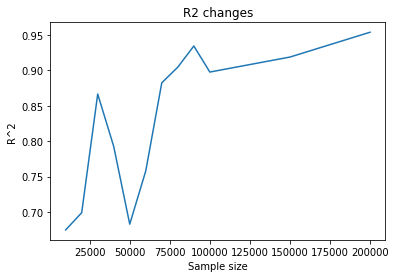

In [19]:
sample_size = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000]
r2 = [R_2_1, R_2_2, R_2_3, R_2_4, R_2_5, R_2_6, R_2_7, R_2_8, R_2_9, R_2_10, R_2_15, R_2_20]
plt.plot(sample_size, r2)
plt.title('R2 changes')
plt.ylabel('R^2')
plt.xlabel('Sample size')

Text(0.5,0,'Sample size')

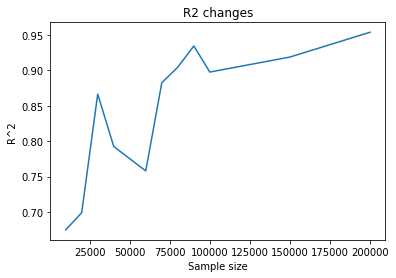

In [20]:
# If remove r_2_5
sample_size = [10000, 20000, 30000, 40000, 60000, 70000, 80000, 90000, 100000, 150000, 200000]
r2 = [R_2_1, R_2_2, R_2_3, R_2_4, R_2_6, R_2_7, R_2_8, R_2_9, R_2_10, R_2_15, R_2_20]
plt.plot(sample_size, r2)
plt.title('R2 changes')
plt.ylabel('R^2')
plt.xlabel('Sample size')